In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score,ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

We are going to implement the best model for prediction from cleaned data set

In [5]:
df = pd.read_csv('/cleaned_real_estate_data.csv')

In [6]:
df

,type,purpose,area,bedroom,bath,price,location,location_city,Price Unit
0,House,For Sale,5445.000,7,6,190000000.0,DHA Defence,Islamabad,Crore
1,House,For Sale,3865.950,6,6,60000000.0,G-15,Islamabad,Crore
2,House,For Sale,2178.000,4,6,26500000.0,B-17,Islamabad,Crore
3,House,For Sale,5445.000,6,6,117000000.0,DHA Defence,Islamabad,Crore
4,House,For Sale,1905.750,4,4,58000000.0,G-13,Islamabad,Crore
...,...,...,...,...,...,...,...,...,...
10561,Shop,For Sale,544.500,0,0,8000000.0,Bahria Town Rawalpindi,Rawalpindi,Lakh
10562,Shop,For Sale,626.175,0,0,8500000.0,Bahria Town Rawalpindi,Rawalpindi,Lakh
10563,Shop,For Sale,571.725,0,0,10300000.0,Bahria Town Rawalpindi,Rawalpindi,Crore
10564,Shop,For Sale,353.925,0,0,6500000.0,Bahria Town Rawalpindi,Rawalpindi,Lakh


In [7]:
df.shape

(10566, 9)

In [9]:
df.describe()

,area,bedroom,bath,price
count,10566.000000,10566.000000,10566.000000,1.056600e+04
mean,3119.735520,2.406114,2.689570,3.336807e+07
std,5382.568344,2.430800,2.618724,5.472946e+07
min,108.900000,0.000000,0.000000,1.450000e+06
25%,1361.250000,0.000000,0.000000,1.150000e+07
50%,2700.000000,3.000000,3.000000,2.030000e+07
75%,4500.000000,5.000000,5.000000,3.800000e+07
max,435600.000000,11.000000,8.000000,2.950000e+09


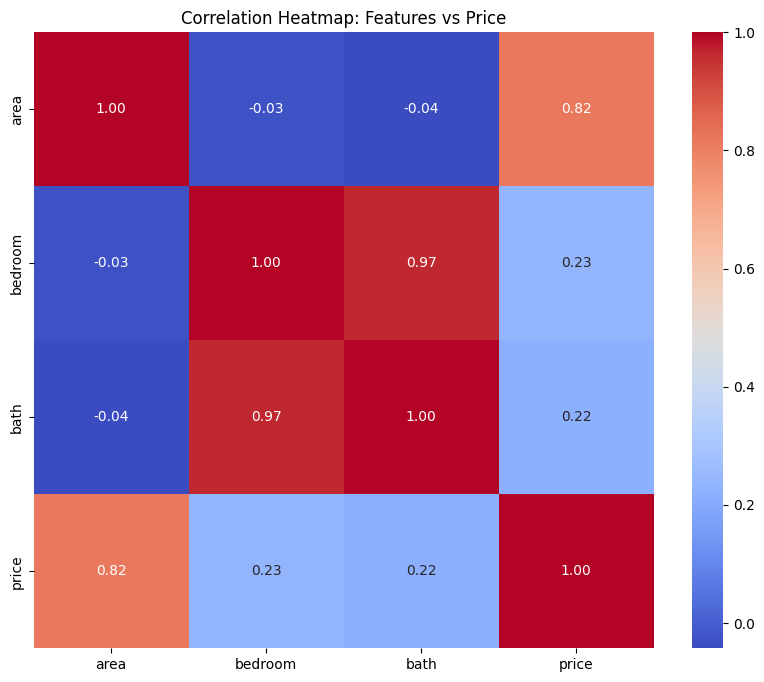

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_df = df[['area', 'bedroom', 'bath', 'price']]
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Features vs Price')
plt.show()

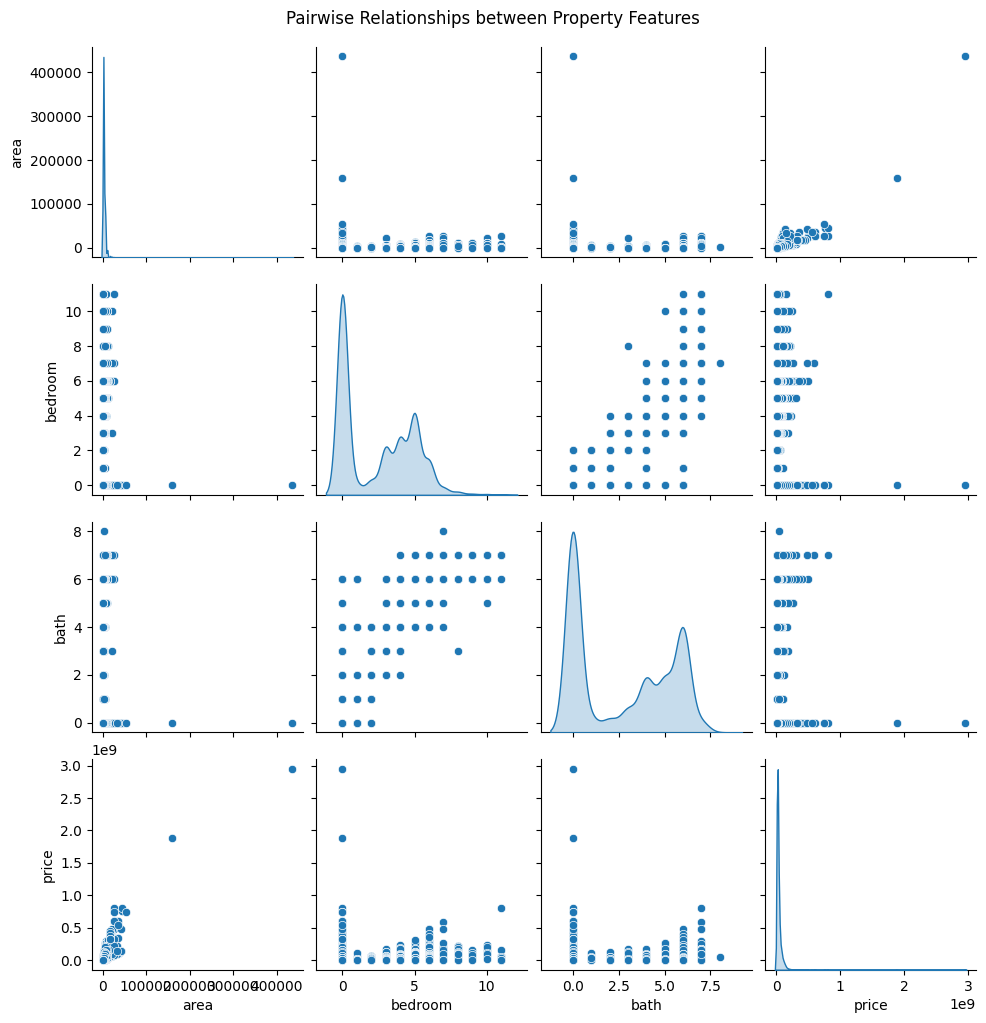

In [13]:
#relationship between price and physical attributes
sns.pairplot(df[['area', 'bedroom', 'bath', 'price']], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Property Features', y=1.02)
plt.show()

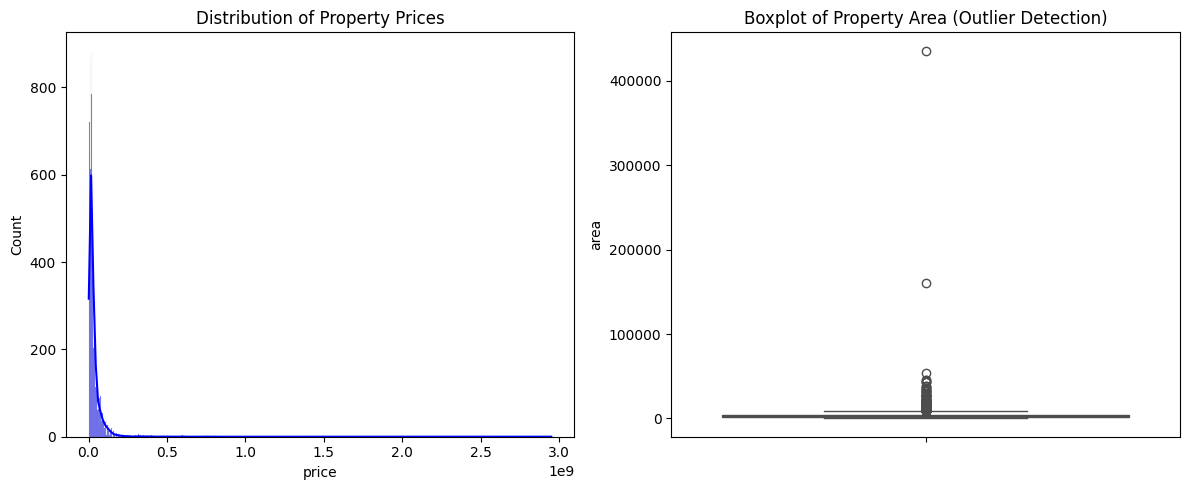

In [14]:
plt.figure(figsize=(12, 5))

# Plot 1: Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of Property Prices')

# Plot 2: Outlier detection for Area
plt.subplot(1, 2, 2)
sns.boxplot(y=df['area'], color='orange')
plt.title('Boxplot of Property Area (Outlier Detection)')

plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(columns=['purpose','Price Unit'])

In [ ]:
df

,type,area,bedroom,bath,price,location,location_city
0,House,5445.000,7,6,190000000.0,DHA Defence,Islamabad
1,House,3865.950,6,6,60000000.0,G-15,Islamabad
2,House,2178.000,4,6,26500000.0,B-17,Islamabad
3,House,5445.000,6,6,117000000.0,DHA Defence,Islamabad
4,House,1905.750,4,4,58000000.0,G-13,Islamabad
...,...,...,...,...,...,...,...
10561,Shop,544.500,0,0,8000000.0,Bahria Town Rawalpindi,Rawalpindi
10562,Shop,626.175,0,0,8500000.0,Bahria Town Rawalpindi,Rawalpindi
10563,Shop,571.725,0,0,10300000.0,Bahria Town Rawalpindi,Rawalpindi
10564,Shop,353.925,0,0,6500000.0,Bahria Town Rawalpindi,Rawalpindi


In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first').set_output(transform='pandas')

In [ ]:
ohe_transform = ohe.fit_transform(df[['type', 'location', 'location_city']])

In [ ]:
ohe_transform

,type_Flat,type_House,type_Office,type_Residential Plot,type_Shop,location_Airport Housing Society,location_B-17,location_Bahria Town,location_Bahria Town Karachi,location_Bahria Town Rawalpindi,...,location_Warsak Road,location_city_Gujranwala,location_city_Hyderabad,location_city_Islamabad,location_city_Karachi,location_city_Lahore,location_city_Multan,location_city_Peshawar,location_city_Rawalpindi,location_city_Sialkot
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10561,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10562,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10563,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10564,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df = pd.concat([df,ohe_transform],axis=1).drop(columns=['type','location','location_city'])

In [ ]:
df

,area,bedroom,bath,price,type_Flat,type_House,type_Office,type_Residential Plot,type_Shop,location_Airport Housing Society,...,location_Warsak Road,location_city_Gujranwala,location_city_Hyderabad,location_city_Islamabad,location_city_Karachi,location_city_Lahore,location_city_Multan,location_city_Peshawar,location_city_Rawalpindi,location_city_Sialkot
0,5445.000,7,6,190000000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3865.950,6,6,60000000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2178.000,4,6,26500000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5445.000,6,6,117000000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1905.750,4,4,58000000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10561,544.500,0,0,8000000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10562,626.175,0,0,8500000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10563,571.725,0,0,10300000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10564,353.925,0,0,6500000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df

,area,bedroom,bath,price,type_Flat,type_House,type_Office,type_Residential Plot,type_Shop,location_Airport Housing Society,...,location_Warsak Road,location_city_Gujranwala,location_city_Hyderabad,location_city_Islamabad,location_city_Karachi,location_city_Lahore,location_city_Multan,location_city_Peshawar,location_city_Rawalpindi,location_city_Sialkot
0,5445.000,7,6,190000000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3865.950,6,6,60000000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2178.000,4,6,26500000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5445.000,6,6,117000000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1905.750,4,4,58000000.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10561,544.500,0,0,8000000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10562,626.175,0,0,8500000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10563,571.725,0,0,10300000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10564,353.925,0,0,6500000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
y

,price
0,190000000.0
1,60000000.0
2,26500000.0
3,117000000.0
4,58000000.0
...,...
10561,8000000.0
10562,8500000.0
10563,10300000.0
10564,6500000.0


In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=41)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.81452723, 0.80219815, 0.77150946, 0.77828568, 0.74665507])

In [ ]:
def best_model_selection(X,y):
    algos = {
        'LinearRegression':{
            'model' : LinearRegression(),
            'params': {}
        },
        'RandomForestRegressor' : {
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators' : [25,32,57,112,54,76],
                'criterion': ['squared_error', 'absolute_error']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=41)
    for algo_name,config in algos.items():
        gsc = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gsc.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gsc.best_score_,
            'best_params':gsc.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
best_model = best_model_selection(X,y)

In [ ]:
best_model

,model,best_score,best_params
0,LinearRegression,0.782635,{}
1,RandomForestRegressor,0.820306,"{'criterion': 'squared_error', 'n_estimators':..."


In [ ]:
best_model['best_params'].loc[1]

{'criterion': 'squared_error', 'n_estimators': 25}

In [ ]:
X

,area,bedroom,bath,type_Flat,type_House,type_Office,type_Residential Plot,type_Shop,location_Airport Housing Society,location_B-17,...,location_Warsak Road,location_city_Gujranwala,location_city_Hyderabad,location_city_Islamabad,location_city_Karachi,location_city_Lahore,location_city_Multan,location_city_Peshawar,location_city_Rawalpindi,location_city_Sialkot
0,5445.000,7,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3865.950,6,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2178.000,4,6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5445.000,6,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1905.750,4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10561,544.500,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10562,626.175,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10563,571.725,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10564,353.925,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X.columns

Index(['area', 'bedroom', 'bath', 'type_Flat', 'type_House', 'type_Office',
       'type_Residential Plot', 'type_Shop',
       'location_Airport Housing Society', 'location_B-17',
       'location_Bahria Town', 'location_Bahria Town Karachi',
       'location_Bahria Town Rawalpindi', 'location_Buch Executive Villas',
       'location_Canal Expressway', 'location_Canal Road',
       'location_Citi Housing', 'location_Citi Housing Society',
       'location_DC Colony', 'location_DHA Defence', 'location_Eden Gardens',
       'location_Eden Orchard', 'location_Eden Valley',
       'location_Eminabad More', 'location_FDA City', 'location_G-13',
       'location_G-15', 'location_GT Road', 'location_Gadap Town',
       'location_Garden Town', 'location_Gulberg',
       'location_Gulistan-e-Jauhar', 'location_Gulshan-e-Iqbal Town',
       'location_Hayatabad', 'location_Hyderabad Bypass', 'location_Latifabad',
       'location_Malir', 'location_Master City Housing Scheme',
       'location_Mu

In [ ]:
X.rename(columns={
    'type_Flat': 'flat',
    'type_House': 'house',
    'type_Office': 'office',
    'type_Residential Plot': 'residential plot',
    'type_Shop': 'shop',
    'location_Airport Housing Society': 'airport housing society',
    'location_B-17': 'b-17',
    'location_Bahria Town': 'bahria town',
    'location_Bahria Town Karachi': 'bahria town karachi',
    'location_Bahria Town Rawalpindi': 'bahria town rawalpindi',
    'location_Buch Executive Villas': 'buch executive villas',
    'location_Canal Expressway': 'canal expressway',
    'location_Canal Road': 'canal road',
    'location_Citi Housing': 'citi housing',
    'location_Citi Housing Society': 'citi housing society',
    'location_DC Colony': 'dc colony',
    'location_DHA Defence': 'dha defence',
    'location_Eden Gardens': 'eden gardens',
    'location_Eden Orchard': 'eden orchard',
    'location_Eden Valley': 'eden valley',
    'location_Eminabad More': 'eminabad more',
    'location_FDA City': 'fda city',
    'location_G-13': 'g-13',
    'location_G-15': 'g-15',
    'location_GT Road': 'gt road',
    'location_Gadap Town': 'gadap town',
    'location_Garden Town': 'garden town',
    'location_Gulberg': 'gulberg',
    'location_Gulistan-e-Jauhar': 'gulistan-e-jauhar',
    'location_Gulshan-e-Iqbal Town': 'gulshan-e-iqbal town',
    'location_Hayatabad': 'hayatabad',
    'location_Hyderabad Bypass': 'hyderabad bypass',
    'location_Latifabad': 'latifabad',
    'location_Malir': 'malir',
    'location_Master City Housing Scheme': 'master city housing scheme',
    'location_Multan Public School Road': 'multan public school road',
    'location_Naya Nazimabad': 'naya nazimabad',
    'location_Palm City Housing Scheme': 'palm city housing scheme',
    'location_Paragon City': 'paragon city',
    'location_Park View City': 'park view city',
    'location_Qasimabad': 'qasimabad',
    'location_Rahatabad': 'rahatabad',
    'location_Raiwind Road': 'raiwind road',
    'location_Regi Model Town': 'regi model town',
    'location_Ring Road': 'ring road',
    'location_Satiana Road': 'satiana road',
    'location_Scheme 33': 'scheme 33',
    'location_Shalimar Colony': 'shalimar colony',
    'location_Taj Residencia': 'taj residencia',
    'location_University Town': 'university town',
    'location_Wapda City': 'wapda city',
    'location_Wapda Town': 'wapda town',
    'location_Warsak Road': 'warsak road',
    'location_city_Gujranwala': 'gujranwala',
    'location_city_Hyderabad': 'hyderabad',
    'location_city_Islamabad': 'islamabad',
    'location_city_Karachi': 'karachi',
    'location_city_Lahore': 'lahore',
    'location_city_Multan': 'multan',
    'location_city_Peshawar': 'peshawar',
    'location_city_Rawalpindi': 'rawalpindi',
    'location_city_Sialkot': 'sialkot'
}, inplace=True)

In [ ]:
rfr = RandomForestRegressor(criterion = 'squared_error', n_estimators= 112)

In [ ]:
rfr.fit(X,y)

RandomForestRegressor(n_estimators=112)

In [ ]:
X.columns

Index(['area', 'bedroom', 'bath', 'flat', 'house', 'office',
       'residential plot', 'shop', 'airport housing society', 'b-17',
       'bahria town', 'bahria town karachi', 'bahria town rawalpindi',
       'buch executive villas', 'canal expressway', 'canal road',
       'citi housing', 'citi housing society', 'dc colony', 'dha defence',
       'eden gardens', 'eden orchard', 'eden valley', 'eminabad more',
       'fda city', 'g-13', 'g-15', 'gt road', 'gadap town', 'garden town',
       'gulberg', 'gulistan-e-jauhar', 'gulshan-e-iqbal town', 'hayatabad',
       'hyderabad bypass', 'latifabad', 'malir', 'master city housing scheme',
       'multan public school road', 'naya nazimabad',
       'palm city housing scheme', 'paragon city', 'park view city',
       'qasimabad', 'rahatabad', 'raiwind road', 'regi model town',
       'ring road', 'satiana road', 'scheme 33', 'shalimar colony',
       'taj residencia', 'university town', 'wapda city', 'wapda town',
       'warsak road', 'gu

In [ ]:
np.where(X.columns=='flat')[0][0]

np.int64(3)

In [ ]:
def predict_prices(area,bedroom,bath,type,city,location):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bedroom
    x[2] = bath
    type_index = np.where(X.columns==type)[0][0]
    city_index = np.where(X.columns==city)[0][0]
    if  x[loc_index] >= 0:
        x[loc_index] = 1
    if x[type_index] >=0:
        x[type_index] = 1
    if x[city_index] >=0:
        x[city_index] = 1

    return rfr.predict([x])[0]

In [ ]:
predict_prices(2178.000,4,6,"house","b-17","islamabad")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(28262808.248299323)

In [ ]:
y

,price
0,190000000.0
1,60000000.0
2,26500000.0
3,117000000.0
4,58000000.0
...,...
10561,8000000.0
10562,8500000.0
10563,10300000.0
10564,6500000.0


In [ ]:
with open('Pakistan_Home_Prices_Model.pickle','wb') as f:
    pickle.dump(rfr,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
gf = pd.read_csv('cleaned_real_estate_data.csv')
gf['location_city'].dtype

dtype('O')

In [ ]:
grouped = gf.groupby(['type', 'location_city'])['location'].unique().apply(list).reset_index()
grouped

,type,location_city,location
0,Commercial Plot,Multan,[DHA Defence]
1,Flat,Hyderabad,"[Qasimabad, Latifabad]"
2,Flat,Karachi,"[DHA Defence, Bahria Town Karachi, Gulistan-e-..."
3,Flat,Peshawar,"[University Town, Ring Road, Rahatabad]"
4,Flat,Rawalpindi,[Bahria Town Rawalpindi]
5,House,Faisalabad,"[Canal Road, Satiana Road, Eden Valley, Eden G..."
6,House,Gujranwala,"[Citi Housing Society, Eminabad More, DC Colon..."
7,House,Hyderabad,[Hyderabad Bypass]
8,House,Islamabad,"[DHA Defence, G-15, B-17, G-13, Bahria Town]"
9,House,Karachi,"[Bahria Town Karachi, DHA Defence, Scheme 33, ..."


In [ ]:
grouped['location'] = grouped['location'].apply(lambda x: str(x).lower())
grouped['type'] = grouped['type'].apply(lambda x: str(x).lower())
grouped['location_city'] = grouped['location_city'].apply(lambda x: str(x).lower())
grouped

,type,location_city,location
0,commercial plot,multan,['dha defence']
1,flat,hyderabad,"['qasimabad', 'latifabad']"
2,flat,karachi,"['dha defence', 'bahria town karachi', 'gulist..."
3,flat,peshawar,"['university town', 'ring road', 'rahatabad']"
4,flat,rawalpindi,['bahria town rawalpindi']
5,house,faisalabad,"['canal road', 'satiana road', 'eden valley', ..."
6,house,gujranwala,"['citi housing society', 'eminabad more', 'dc ..."
7,house,hyderabad,['hyderabad bypass']
8,house,islamabad,"['dha defence', 'g-15', 'b-17', 'g-13', 'bahri..."
9,house,karachi,"['bahria town karachi', 'dha defence', 'scheme..."


In [ ]:
import json
json_str = grouped.to_json(orient="records", indent=2)
locations_data = {
    'locations_data' : grouped.to_json(orient="records", indent=2)
}

# Save the JSON string to a file
with open("locations.json", "w") as f:
    f.write(json.dumps(locations_data))